<h1>ロジスティック回帰（Irisデータセット）</h1>

<h2>必要モジュールとデータのインポート</h2>

In [57]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [3]:
# irisデータをインポート
iris = load_iris()

In [5]:
# カラム名を確認
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<h2>データフレームの作成</h2>

In [9]:
# 説明変数をデータフレーム化
df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
# 目的変数をDataFrameへ追加
df['target'] = np.array(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h2>データの確認</h2>

irisデータセットは150レコード  
特徴量は4カラム  
欠損値、外れ値はない  

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [17]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


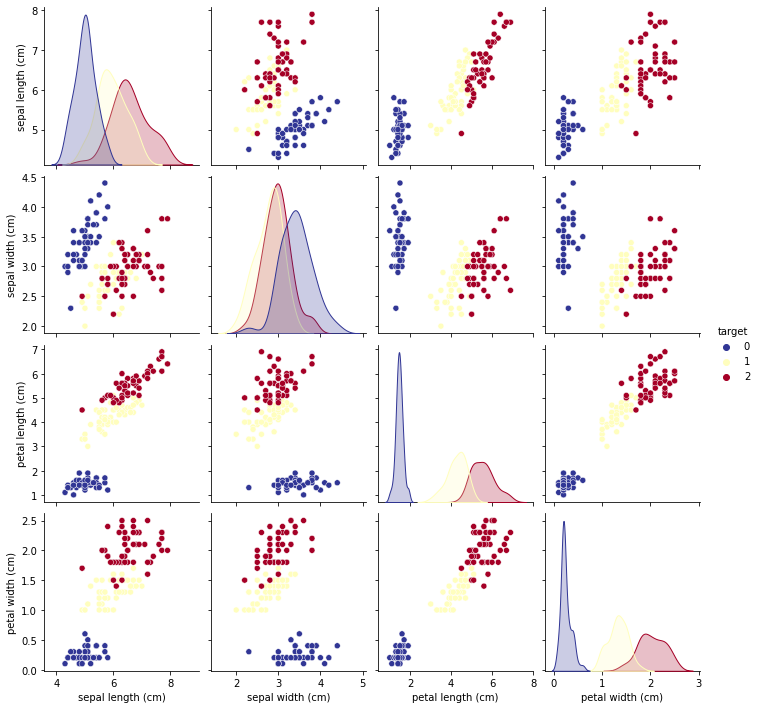

In [24]:
sns.pairplot(df, hue='target', palette='RdYlBu_r')

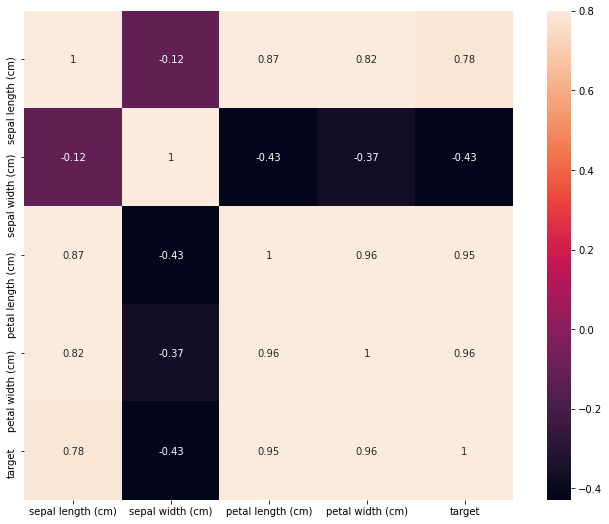

In [25]:
# ヒートマップを作成
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)

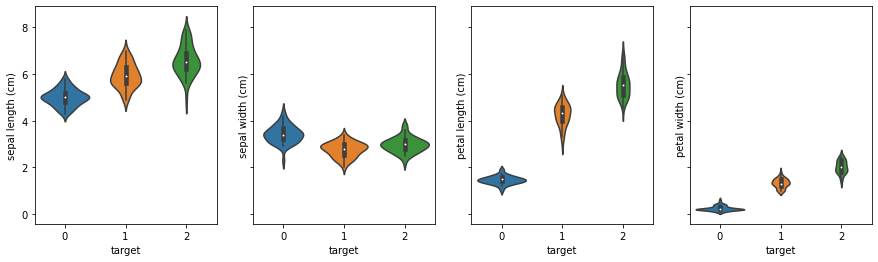

In [35]:
# 説明変数と目的変数の関係(violinplot)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4) , sharey=True)

sns.violinplot(x='target', y='sepal length (cm)', data=df, ax=ax1)
sns.violinplot(x='target', y='sepal width (cm)', data=df, ax=ax2)
sns.violinplot(x='target', y='petal length (cm)', data=df, ax=ax3)
sns.violinplot(x='target', y='petal width (cm)', data=df, ax=ax4)

<h1>前処理</h1>

In [36]:
# 特徴量と目的変数を分ける
df_X = df.drop(['target'], axis=1)
df_y = df['target']

In [39]:
# 特徴量を標準化する
scaler = StandardScaler()
df_Xs = scaler.fit_transform(df_X)
df_Xs = pd.DataFrame(df_Xs, columns=iris.feature_names)

In [41]:
# 70%を学習用、30%を検証用データにするよう分割(ホールドアウト法)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.3, random_state = 2021, stratify=df_y)

<h1>ロジスティック回帰</h1>

In [45]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# テストデータで予測
pred = clf.predict(X_test)

In [51]:
pred

array([0, 2, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0,
       0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0,
       2])

<h1>モデルの検証</h1>

F1スコアが0.91となり、高い精度で分類できていることがわかる。

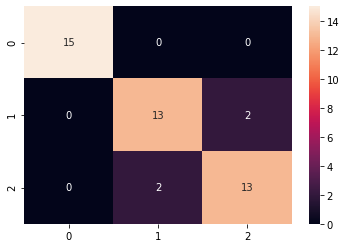

In [47]:
#混同行列をプロット
classes = [0, 1, 2]
cm = confusion_matrix(y_test, pred, labels=classes)
cmdf = pd.DataFrame(cm, index=classes, columns=classes)
sns.heatmap(cmdf, annot=True)

In [50]:
# F値
f1_score = f1_score(y_test, pred, average='macro')
print(f1_score)

0.9111111111111111


In [56]:
# 評価指標を一括表示
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.87      0.87        15
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

